<a href="https://colab.research.google.com/github/alexiej/laboratory/blob/master/DW_POZNAN_10_Data_Augmentation_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
print("Tensorflow version: ", tf.__version__)


!nvidia-smi

Tensorflow version:  2.2.0
Thu Jun  4 07:42:55 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                 

# Dog/Cata Augmentacja danych

## Pobrane danych

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

print(PATH)

68608000/68606236 [==============================] - 1s 0us/step
/root/.keras/datasets/cats_and_dogs_filtered


In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
batch_size = 128

In [8]:
!ls /root/.keras/datasets/cats_and_dogs_filtered/

train  validation  vectorize.py


## Wykresy do history

In [0]:
def plot_history(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs_range = range(len(acc))

  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

In [0]:
def show_sample(x,y, n=16):
  size = int(n**.5)
  i = 0;
  fig, axs = plt.subplots(size, size)
  for ax in range(size):
    for ay in range(size):
      ax1 = axs[ax,ay]
      ax1.figure.set_size_inches(15, 15)
      ax1.imshow(x[i])
      ax1.set_title(y[i])
      ax1.axis('off')
      i+=1;
      if(i>16):
        break
  plt.show()

In [0]:
def get_train_val(datagen, batch_size=64):
  return (datagen.flow_from_directory(train_dir, class_mode='binary', batch_size=64), 
          datagen.flow_from_directory(validation_dir, class_mode='binary', batch_size=64))

## ImageDataGenerator - bez Data Augmentation

In [94]:
train_it, val_it = get_train_val(ImageDataGenerator(rescale=1./255))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


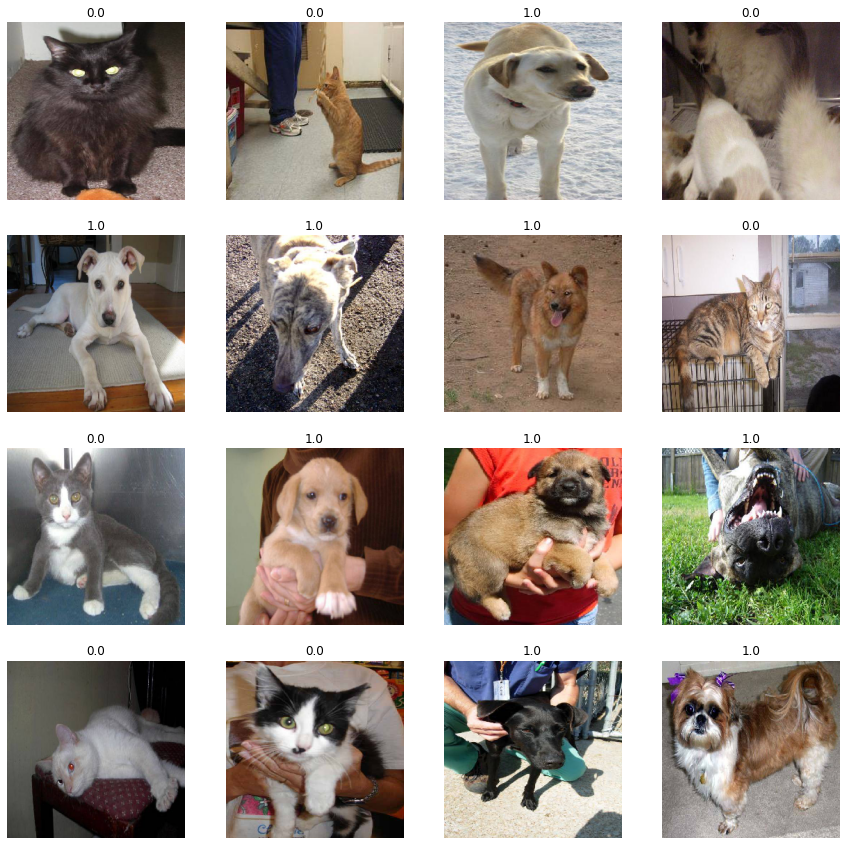

In [95]:
x,y = train_it.next()
show_sample(x,y)

## Trenowane

In [0]:
def get_model(x):
  IMG_WIDTH =  x[0].shape[0]
  IMG_HEIGHT = x[0].shape[0]
  
  model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
  ])
  model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
  print(model.summary())
  return model

In [102]:
model = get_model(x)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 65536)            

In [103]:
history = model.fit(
    train_it,
    epochs=10,
    validation_data=val_it
)


Epoch 1/10
32/32 [==============================] - 12s 376ms/step - loss: 1.0551 - accuracy: 0.5070 - val_loss: 0.6837 - val_accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 12s 370ms/step - loss: 0.6682 - accuracy: 0.5465 - val_loss: 0.6567 - val_accuracy: 0.5250
Epoch 3/10
32/32 [==============================] - 12s 371ms/step - loss: 0.6300 - accuracy: 0.5830 - val_loss: 0.6413 - val_accuracy: 0.5390
Epoch 4/10
32/32 [==============================] - 12s 371ms/step - loss: 0.5324 - accuracy: 0.7035 - val_loss: 0.6143 - val_accuracy: 0.6370
Epoch 5/10
32/32 [==============================] - 12s 370ms/step - loss: 0.4592 - accuracy: 0.7645 - val_loss: 0.6418 - val_accuracy: 0.6730
Epoch 6/10
32/32 [==============================] - 12s 368ms/step - loss: 0.3319 - accuracy: 0.8575 - val_loss: 0.6879 - val_accuracy: 0.6930
Epoch 7/10
32/32 [==============================] - 12s 368ms/step - loss: 0.2224 - accuracy: 0.9035 - val_loss: 0.8555 - val_accuracy: 0.6840

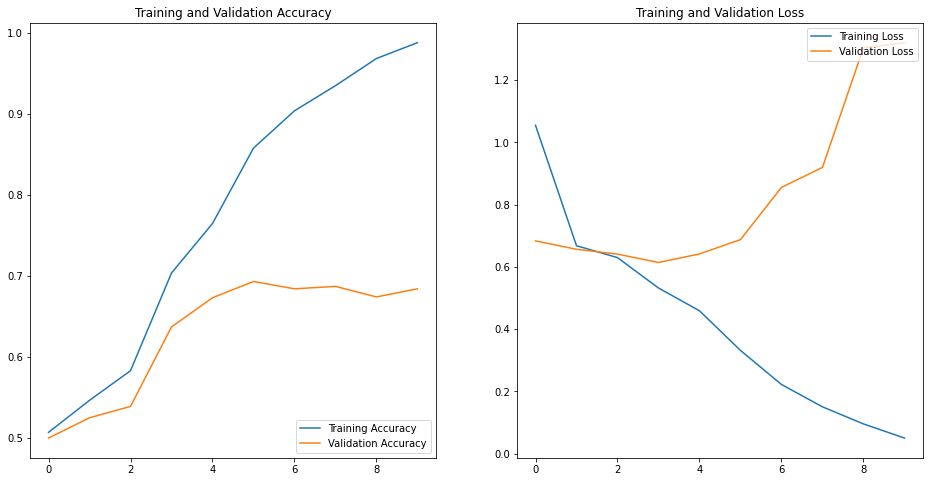

In [104]:
plot_history(history)

## Data Augmentatoin

In [105]:
train_it, val_it = get_train_val(ImageDataGenerator(
                                rescale=1./255, 
                               rotation_range=45))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


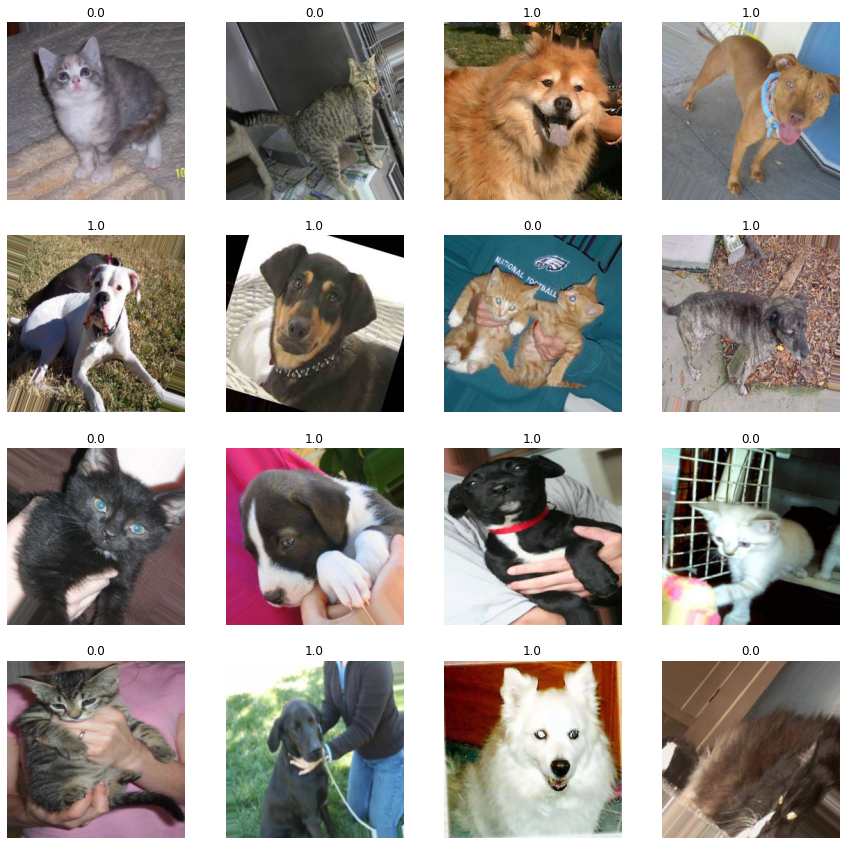

In [106]:
x,y = train_it.next()
show_sample(x,y)

In [107]:
model = get_model(x)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 65536)            

In [108]:
history = model.fit(
    train_it,
    epochs=10,
    validation_data=val_it
)

Epoch 1/10
32/32 [==============================] - 50s 2s/step - loss: 1.1514 - accuracy: 0.5010 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 51s 2s/step - loss: 0.6957 - accuracy: 0.5020 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 51s 2s/step - loss: 0.6878 - accuracy: 0.5070 - val_loss: 0.6778 - val_accuracy: 0.5020
Epoch 4/10
32/32 [==============================] - 51s 2s/step - loss: 0.6658 - accuracy: 0.5380 - val_loss: 0.6690 - val_accuracy: 0.5450
Epoch 5/10
32/32 [==============================] - 51s 2s/step - loss: 0.6435 - accuracy: 0.6015 - val_loss: 0.6582 - val_accuracy: 0.5440
Epoch 6/10
32/32 [==============================] - 51s 2s/step - loss: 0.6413 - accuracy: 0.6000 - val_loss: 0.6246 - val_accuracy: 0.6580
Epoch 7/10
32/32 [==============================] - 51s 2s/step - loss: 0.6021 - accuracy: 0.6505 - val_loss: 0.6313 - val_accuracy: 0.6410
Epoch 8/10
32/32 [==

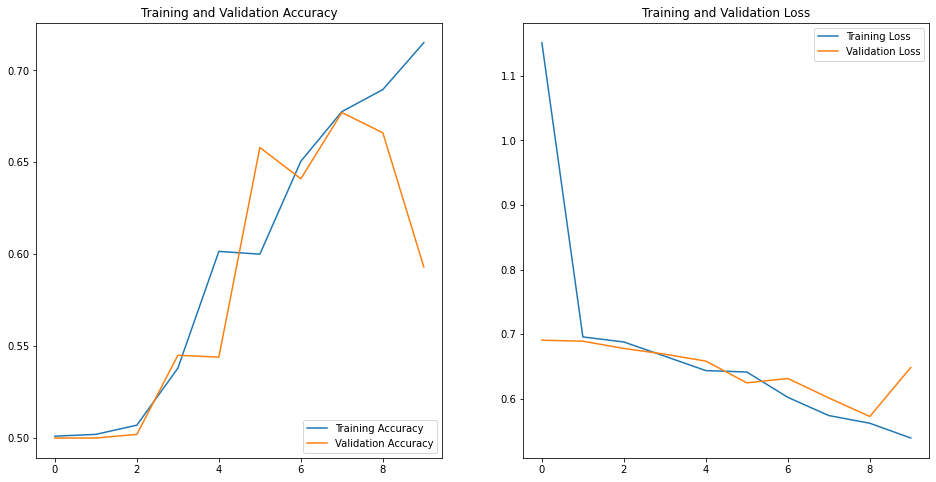

In [109]:
plot_history(history)

## Image Augmentation

```python
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False,
    vertical_flip=False, rescale=None, preprocessing_function=None,
    data_format=None, validation_split=0.0, dtype=None
)
```

In [111]:
train_it, val_it = get_train_val(ImageDataGenerator(
                                rescale=1./255, 
                                rotation_range=45,
                                width_shift_range=.15,
                                height_shift_range=.15,
                                horizontal_flip=True,
                                vertical_flip=False,
                                zoom_range=0.5))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


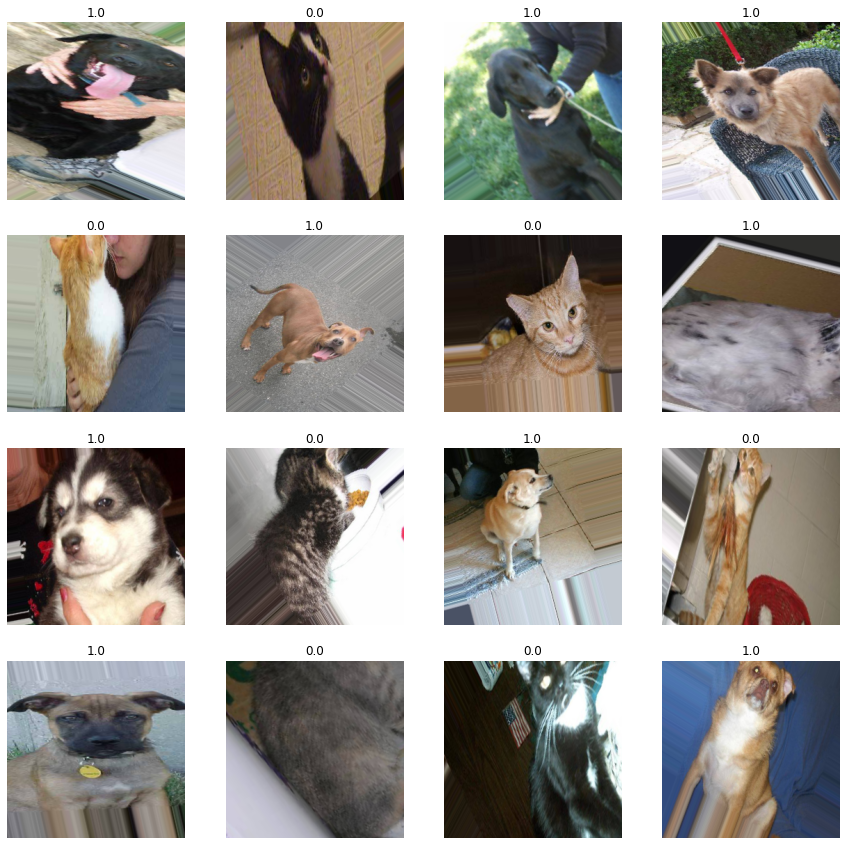

In [112]:
x,y = train_it.next()
show_sample(x,y)

In [113]:
model = get_model(x)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 65536)            

In [114]:
history = model.fit(
    train_it,
    epochs=10,
    validation_data=val_it
)

Epoch 1/10
32/32 [==============================] - 51s 2s/step - loss: 0.8729 - accuracy: 0.5085 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 51s 2s/step - loss: 0.6901 - accuracy: 0.5135 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 51s 2s/step - loss: 0.6910 - accuracy: 0.5000 - val_loss: 0.6883 - val_accuracy: 0.5010
Epoch 4/10
32/32 [==============================] - 51s 2s/step - loss: 0.6762 - accuracy: 0.5425 - val_loss: 0.6824 - val_accuracy: 0.5090
Epoch 5/10
32/32 [==============================] - 51s 2s/step - loss: 0.6721 - accuracy: 0.5485 - val_loss: 0.6678 - val_accuracy: 0.5420
Epoch 6/10
32/32 [==============================] - 51s 2s/step - loss: 0.6622 - accuracy: 0.5425 - val_loss: 0.6380 - val_accuracy: 0.6050
Epoch 7/10
32/32 [==============================] - 51s 2s/step - loss: 0.6533 - accuracy: 0.5810 - val_loss: 0.6515 - val_accuracy: 0.5790
Epoch 8/10
32/32 [==

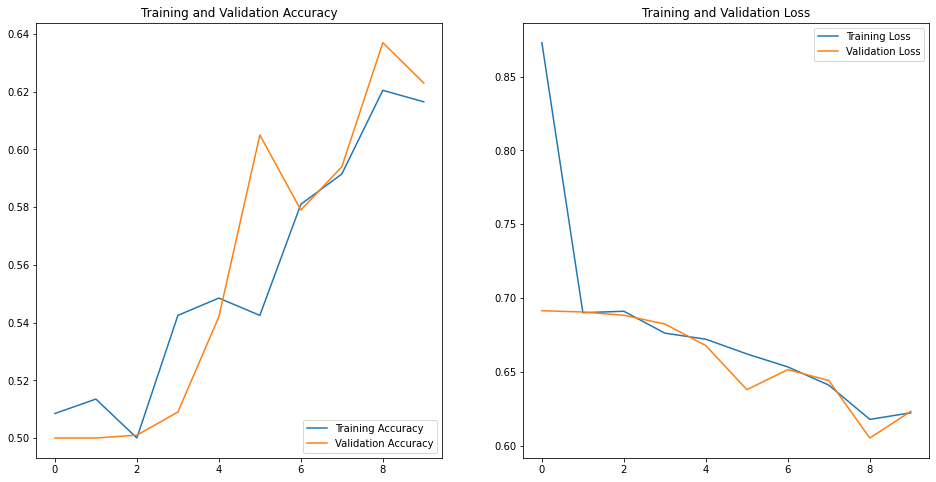

In [115]:
plot_history(history)